In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def double_knockout_put_crr(s0, k, r, t, sigma, upper_barrier, lower_barrier, n):
    dt = t / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    stock_tree = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            stock_tree[j, i] = s0 * (u ** (i - j)) * (d ** j)

    option_tree = np.zeros((n + 1, n + 1))
    for j in range(n + 1):
        S = stock_tree[j, n]
        option_tree[j, n] = max(k - S, 0) if lower_barrier < S < upper_barrier else 0

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            S = stock_tree[j, i]
            if lower_barrier < S < upper_barrier:
                expected = p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
                option_tree[j, i] = discount * expected
            else:
                option_tree[j, i] = 0

    return option_tree[0, 0]

In [20]:
def plot_double_knockout_put_crr(s0_list, premium_list):
    plt.figure(figsize = (10, 6))
    plt.plot(s0_list, premium_list, label='Double Knock-Out Put (CRR)')
    plt.xlabel("Initial Stock Price")
    plt.ylabel("Option Premium")
    plt.title("Double Knock-Out Put Option Premium (CRR Binomial Tree)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

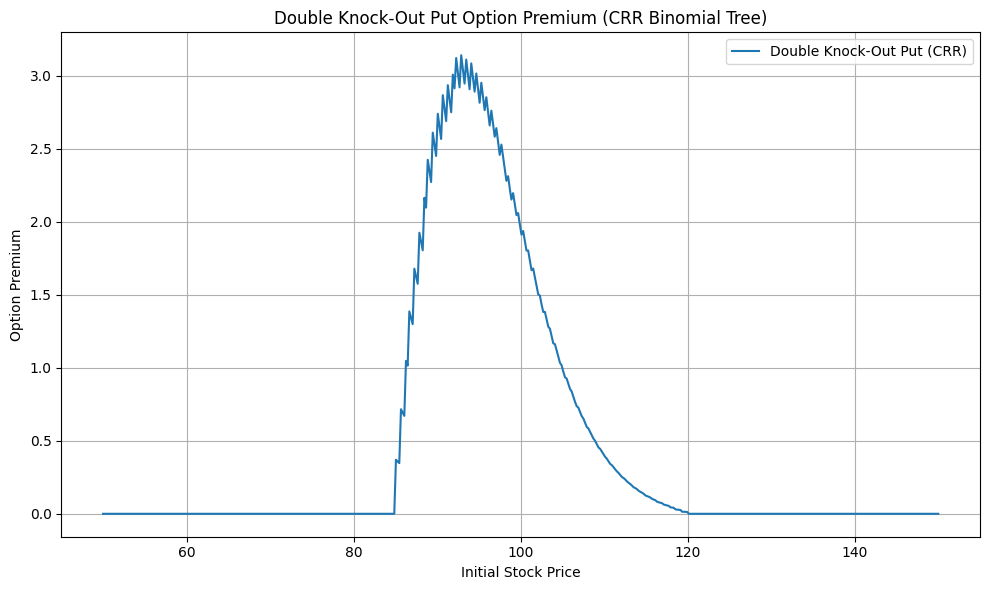

In [22]:
s0_list = np.linspace(50, 150, 500)
k = 100
upper_barrier = 120
lower_barrier = 85
r = 0.1
t = 0.2
sigma = 0.2
n = 200

premium_list = [double_knockout_put_crr(s, k, r, t, sigma, upper_barrier, lower_barrier, n) for s in s0_list]
plot_double_knockout_put_crr(s0_list, premium_list)

## Monte Carlo Simulation for Double Knock-Out Put Option

In [3]:

def double_knockout_put_mc(s0, k, r, t, sigma, upper_barrier, lower_barrier, n, m):
    dt = t / n
    discount = np.exp(-r * t)
    payoffs = []

    for _ in range(m):
        st = s0
        knocked_out = False

        for _ in range(n):
            z = np.random.randn()
            st *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
            if st >= upper_barrier or st <= lower_barrier:
                knocked_out = True
                break

        payoff = 0 if knocked_out else max(k - st, 0)
        payoffs.append(payoff)

    return discount * np.mean(payoffs)

In [24]:
def plot_double_knockout_put_mc(s0_list, premium_list):
    plt.figure(figsize = (10, 6))
    plt.plot(s0_list, premium_list, label='Double Knock-Out Put (MC)')
    plt.xlabel("Initial Stock Price")
    plt.ylabel("Option Premium")
    plt.title("Double Knock-Out Put Option via Monte Carlo")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

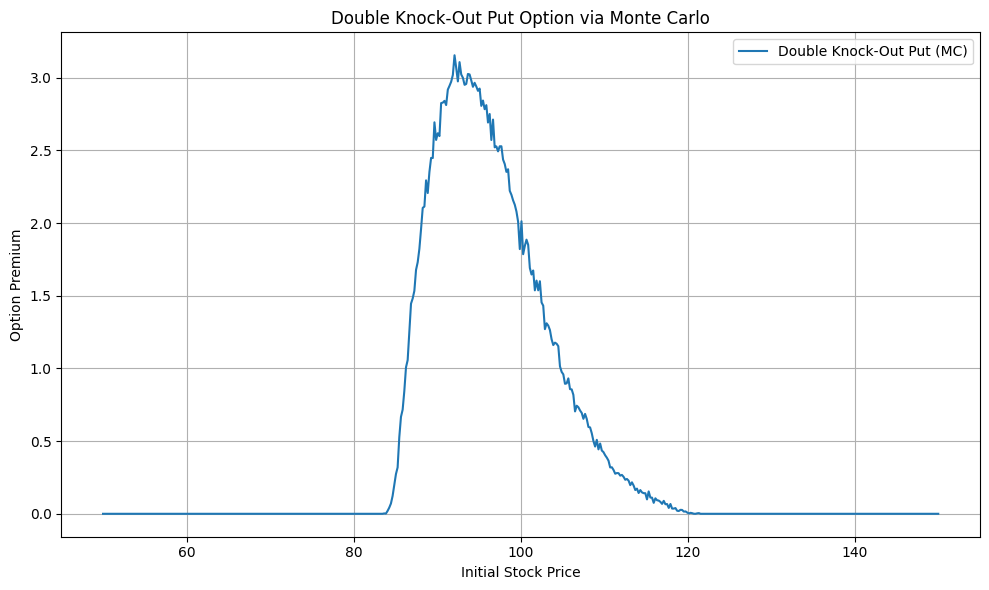

In [25]:
s0_list = np.linspace(50, 150, 500)
k = 100
upper_barrier = 120
lower_barrier = 85
r = 0.1
t = 0.2
sigma = 0.2
n = 200
m = 3000

premium_list = [double_knockout_put_mc(s, k, r, t, sigma, upper_barrier, lower_barrier, n, m) for s in s0_list]
plot_double_knockout_put_mc(s0_list, premium_list)